# Seaborn

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [59]:
list_of_orders=pd.read_excel("Amazing Mart.xlsx",sheet_name="ListOfOrders")
orders_breakdown=pd.read_excel("Amazing Mart.xlsx",sheet_name="OrderBreakdown")

In [60]:
df=pd.merge(list_of_orders,orders_breakdown)

In [62]:
df.sample()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,lon,lat,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
3641,AZ-2013-6528182,2013-03-11,Dylan O'Halloran,Bury,United Kingdom,North,Home Office,2013-03-14,Economy Plus,England,-2.296605,53.59335,"Eldon Box, Blue",0.0,41,11,4,Office Supplies,Storage


In [5]:
date_sales=df[["Order Date","Sales"]]
date_sales

,Order Date,Sales
0,2011-01-01,45
1,2011-01-03,854
2,2011-01-04,140
3,2011-01-04,27
4,2011-01-04,17
...,...,...
8042,2014-12-31,289
8043,2014-12-31,32
8044,2014-12-31,30
8045,2014-12-31,23


In [6]:
date_sales=df[["Order Date","Sales"]]
date_sales.sort_values("Order Date")

,Order Date,Sales
0,2011-01-01,45
1,2011-01-03,854
2,2011-01-04,140
3,2011-01-04,27
4,2011-01-04,17
...,...,...
8041,2014-12-31,867
8042,2014-12-31,289
8043,2014-12-31,32
8044,2014-12-31,30


In [7]:
date_sales["month_year"]=date_sales["Order Date"].dt.to_period("M")

In [63]:
monthly_sales=date_sales.groupby("month_year")["Sales"].sum().reset_index()
monthly_sales

,month_year,Sales
0,2011-01,14335
1,2011-02,21646
2,2011-03,20567
3,2011-04,21920
4,2011-05,28955
5,2011-06,48837
6,2011-07,16635
7,2011-08,47822
8,2011-09,62455
9,2011-10,15670


In [9]:
monthly_sales["month_year"]=monthly_sales["month_year"].astype(str)

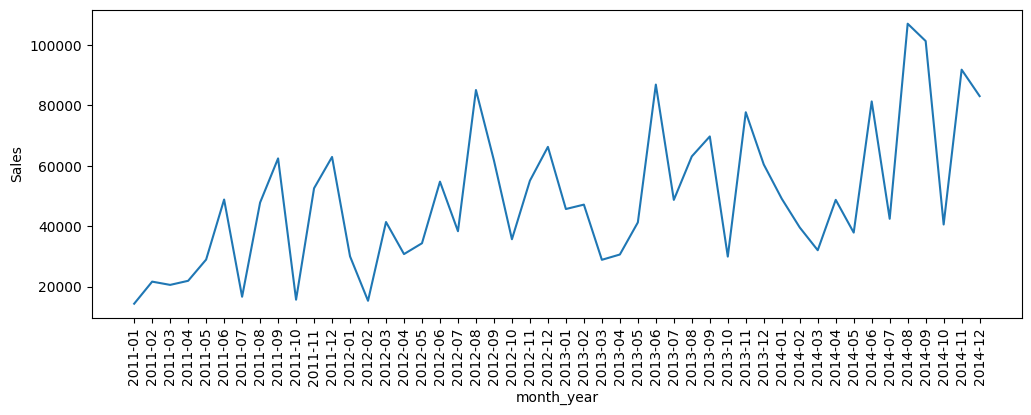

In [10]:
plt.figure(figsize=(12,4))
sns.lineplot(monthly_sales,x="month_year",y="Sales")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Order Date', ylabel='Sales'>

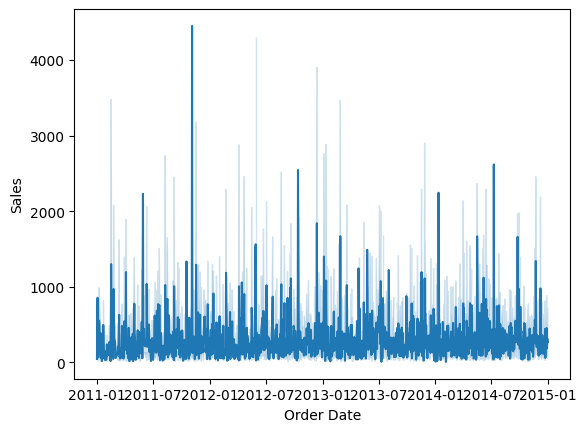

In [11]:
sns.lineplot(date_sales,x="Order Date",y="Sales")

In [12]:
df["Month"]=df["Order Date"].dt.month
df["Month"]

0        1
1        1
2        1
3        1
4        1
        ..
8042    12
8043    12
8044    12
8045    12
8046    12
Name: Month, Length: 8047, dtype: int32

In [13]:
month_category_sales_profit=df.groupby(["Month","Category"])[["Sales","Profit"]].mean().reset_index()
month_category_sales_profit

,Month,Category,Sales,Profit
0,1,Furniture,453.910448,24.298507
1,1,Office Supplies,181.301205,27.346386
2,1,Technology,647.373333,90.666667
3,2,Furniture,583.764706,42.852941
4,2,Office Supplies,151.199275,27.894928
5,2,Technology,469.533333,42.988889
6,3,Furniture,549.786885,-7.688525
7,3,Office Supplies,155.297806,28.178683
8,3,Technology,485.341463,53.780488
9,4,Furniture,534.315789,76.807018


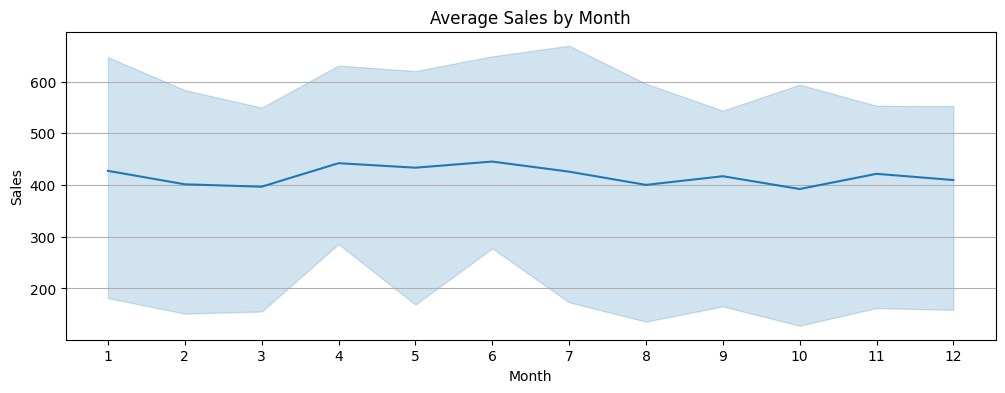

In [14]:
plt.figure(figsize=(12,4))
sns.lineplot(month_category_sales_profit,x="Month",y="Sales")
plt.title("Average Sales by Month")
plt.grid(axis="y")
plt.xticks(range(1,13))
plt.show()

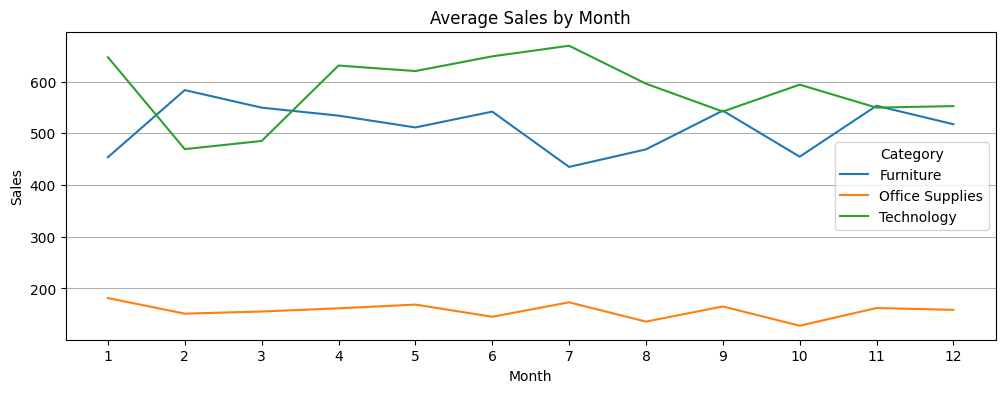

In [15]:
plt.figure(figsize=(12,4))
sns.lineplot(month_category_sales_profit,x="Month",y="Sales",hue="Category")
plt.title("Average Sales by Month")
plt.grid(axis="y")
plt.xticks(range(1,13))
plt.show()

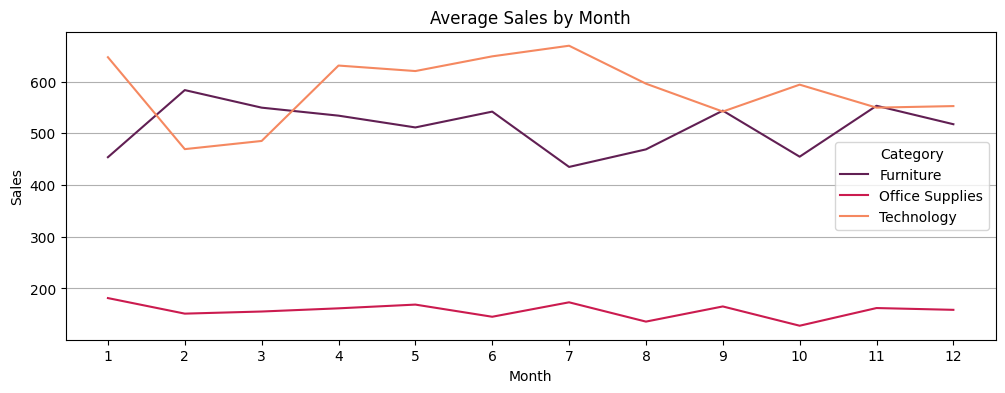

In [16]:
plt.figure(figsize=(12,4))
sns.lineplot(month_category_sales_profit,x="Month",y="Sales",hue="Category",palette="rocket")
plt.title("Average Sales by Month")
plt.grid(axis="y")
plt.xticks(range(1,13))
plt.show()

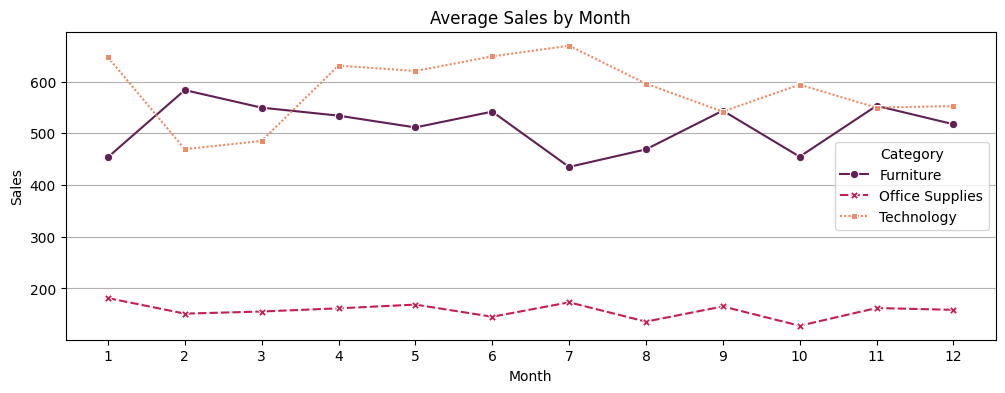

In [17]:
plt.figure(figsize=(12,4))
sns.lineplot(month_category_sales_profit,x="Month",y="Sales",hue="Category",
             style="Category",palette="rocket",markers=True)
plt.title("Average Sales by Month")
plt.grid(axis="y")
plt.xticks(range(1,13))
plt.show()

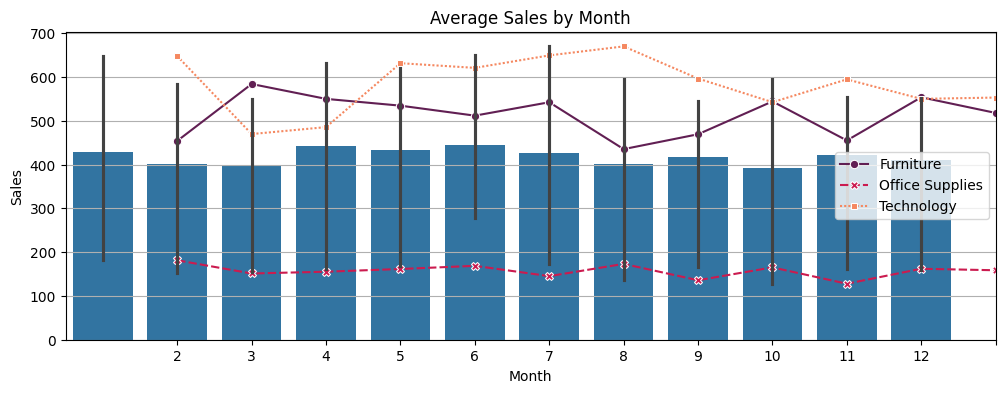

In [18]:
plt.figure(figsize=(12,4))
sns.lineplot(month_category_sales_profit,x="Month",y="Sales",hue="Category",
             style="Category",palette="rocket",markers=True)
sns.barplot(month_category_sales_profit,x="Month",y="Sales")
plt.title("Average Sales by Month")
plt.grid(axis="y")
plt.xticks(range(1,13))
plt.show()

In [19]:
sales_sub_category=df.groupby("Sub-Category")["Sales"].sum().reset_index()
sales_sub_category

,Sub-Category,Sales
0,Accessories,131309
1,Appliances,209900
2,Art,127184
3,Binders,78934
4,Bookcases,294396
5,Chairs,186698
6,Copiers,290081
7,Envelopes,31210
8,Fasteners,16238
9,Furnishings,68237


In [20]:
sales_sub_category=df.groupby(["Category","Sub-Category"])["Sales"].sum().reset_index()
sales_sub_category

,Category,Sub-Category,Sales
0,Furniture,Bookcases,294396
1,Furniture,Chairs,186698
2,Furniture,Furnishings,68237
3,Furniture,Tables,89478
4,Office Supplies,Appliances,209900
5,Office Supplies,Art,127184
6,Office Supplies,Binders,78934
7,Office Supplies,Envelopes,31210
8,Office Supplies,Fasteners,16238
9,Office Supplies,Labels,12822


<Axes: xlabel='Sub-Category', ylabel='Sales'>

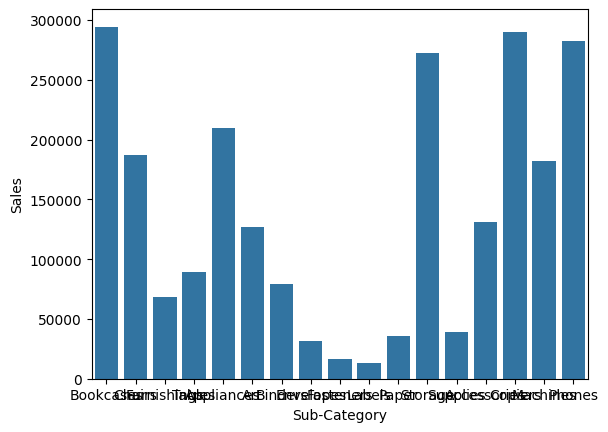

In [21]:
sns.barplot(sales_sub_category,x="Sub-Category",y="Sales")

<Axes: xlabel='Sub-Category', ylabel='Sales'>

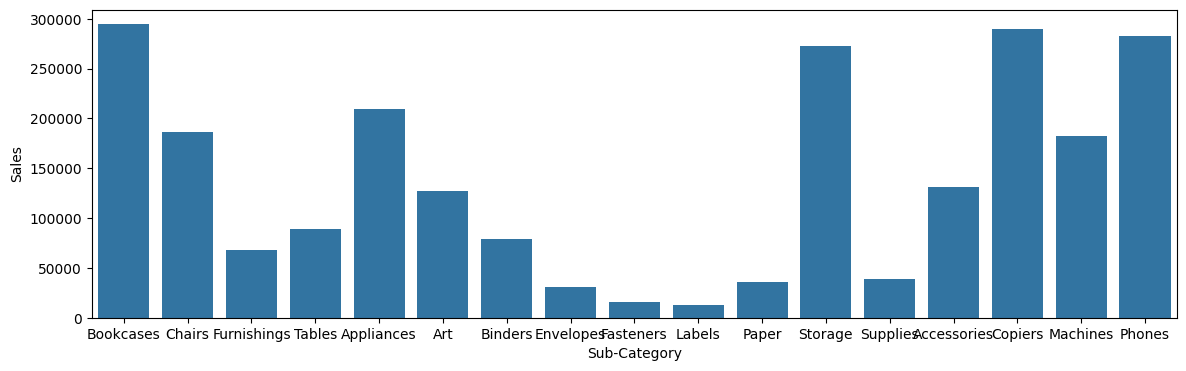

In [22]:
plt.figure(figsize=(14,4))
sns.barplot(sales_sub_category,x="Sub-Category",y="Sales")

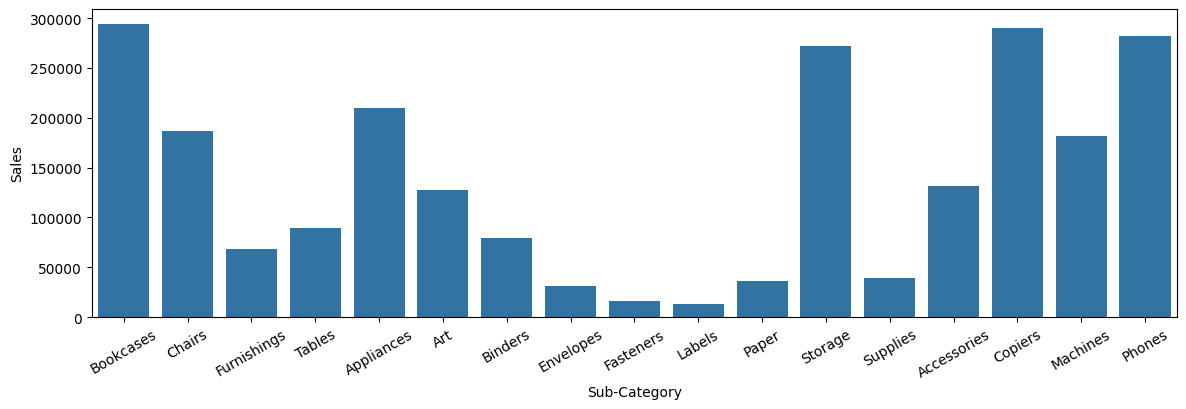

In [23]:
plt.figure(figsize=(14,4))
sns.barplot(sales_sub_category,x="Sub-Category",y="Sales")
plt.xticks(rotation=30)
plt.show()

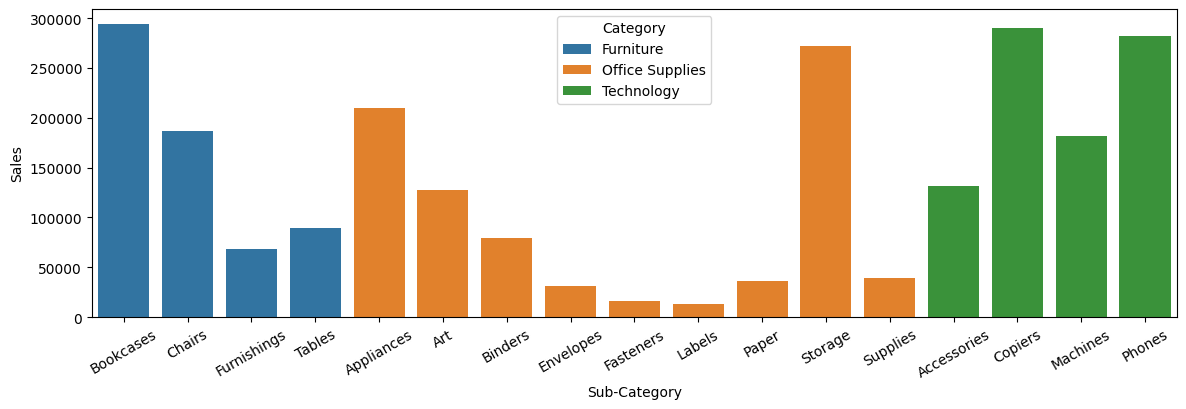

In [24]:
plt.figure(figsize=(14,4))
sns.barplot(sales_sub_category,x="Sub-Category",y="Sales",hue="Category")
plt.xticks(rotation=30)
plt.show()

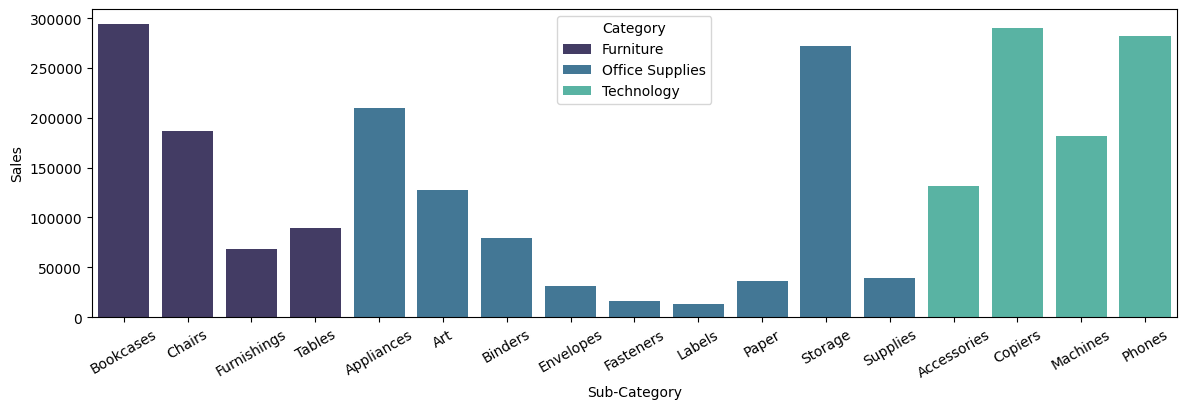

In [25]:
plt.figure(figsize=(14,4))
sns.barplot(sales_sub_category,x="Sub-Category",y="Sales",hue="Category",palette="mako")
plt.xticks(rotation=30)
plt.show()

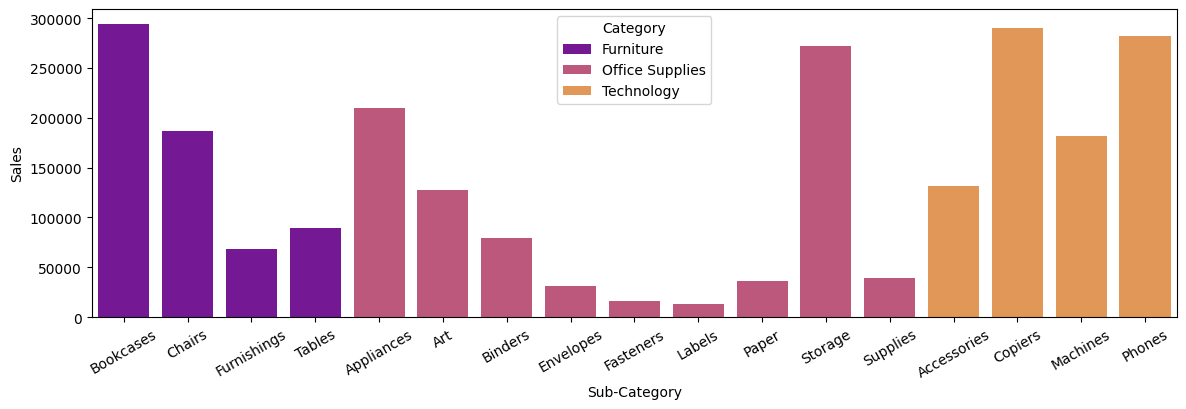

In [26]:
plt.figure(figsize=(14,4))
sns.barplot(sales_sub_category,x="Sub-Category",y="Sales",hue="Category",palette="plasma")
plt.xticks(rotation=30)
plt.show()

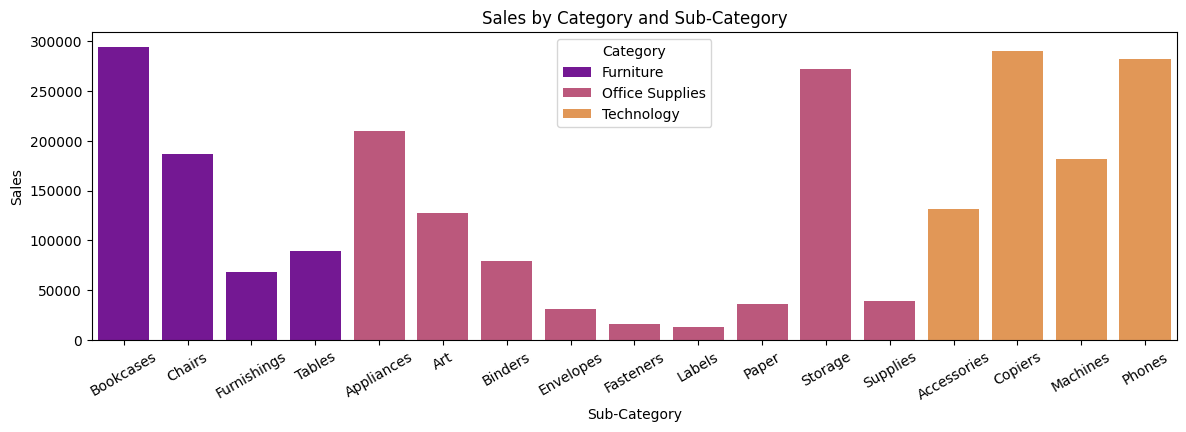

In [27]:
plt.figure(figsize=(14,4))
sns.barplot(sales_sub_category,x="Sub-Category",y="Sales",hue="Category",palette="plasma")
plt.title("Sales by Category and Sub-Category")
plt.xticks(rotation=30)
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

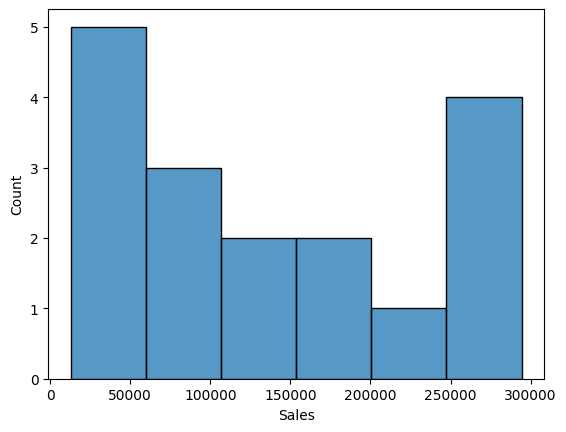

In [28]:
sns.histplot(sales_sub_category,x="Sales")

<Axes: xlabel='Sales', ylabel='Count'>

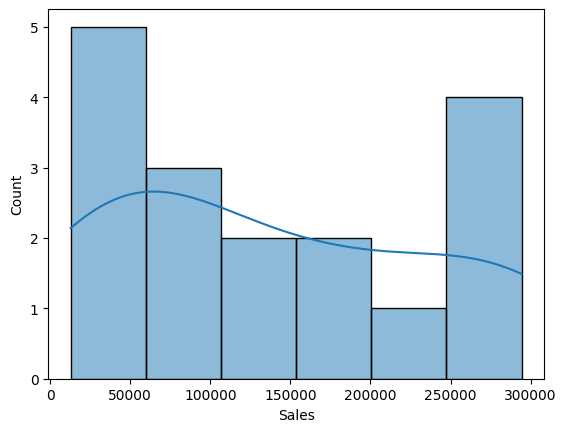

In [29]:
sns.histplot(sales_sub_category,x="Sales",kde=True)

<Axes: xlabel='Sales', ylabel='Count'>

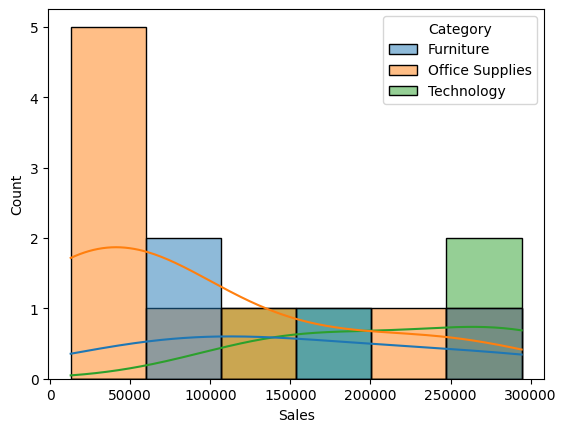

In [30]:
sns.histplot(sales_sub_category,x="Sales",kde=True,hue="Category")

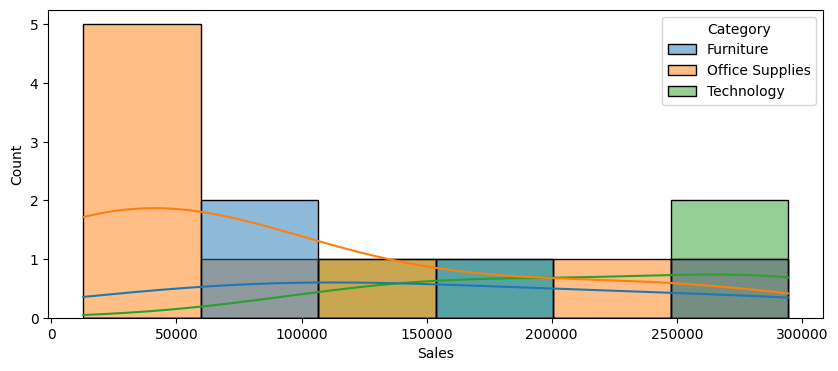

In [31]:
plt.figure(figsize=(10,4))
sns.histplot(sales_sub_category,x="Sales",kde=True,hue="Category")
plt.show()

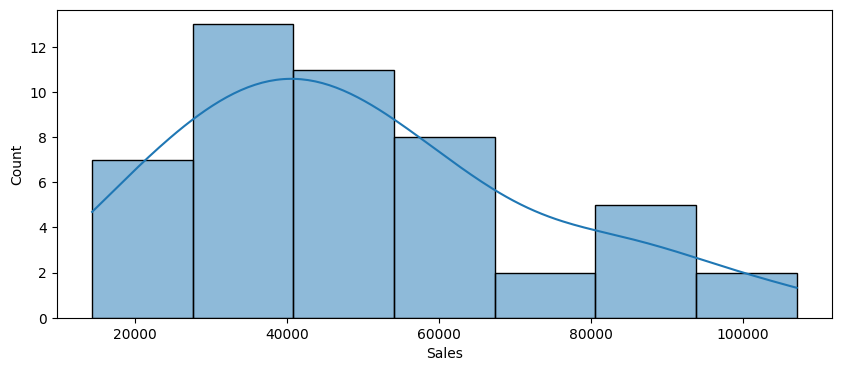

In [32]:
plt.figure(figsize=(10,4))
sns.histplot(monthly_sales,x="Sales",kde=True)
plt.show()

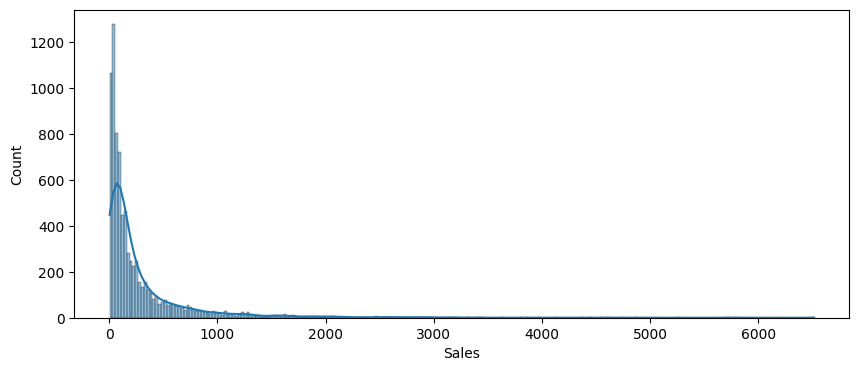

In [33]:
plt.figure(figsize=(10,4))
sns.histplot(df,x="Sales",kde=True)
plt.show()

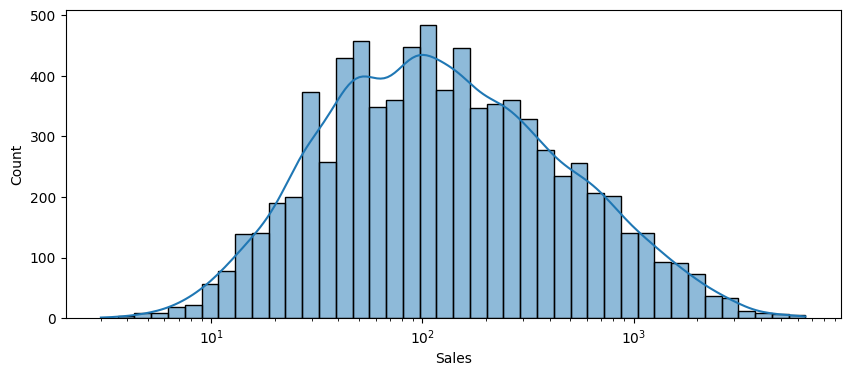

In [34]:
plt.figure(figsize=(10,4))
sns.histplot(df,x="Sales",kde=True,log_scale=True)
plt.show()

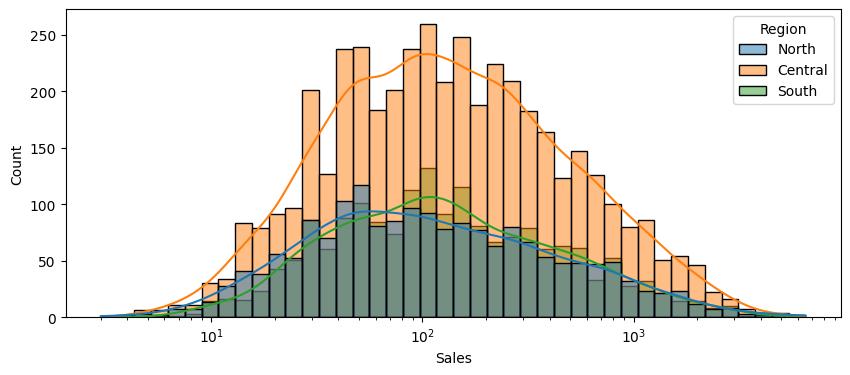

In [35]:
plt.figure(figsize=(10,4))
sns.histplot(df,x="Sales",kde=True,log_scale=True,hue="Region")
plt.show()

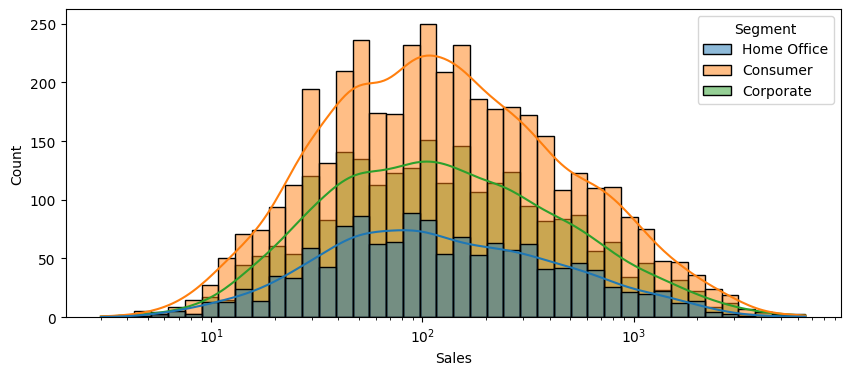

In [36]:
plt.figure(figsize=(10,4))
sns.histplot(df,x="Sales",kde=True,log_scale=True,hue="Segment")
plt.show()

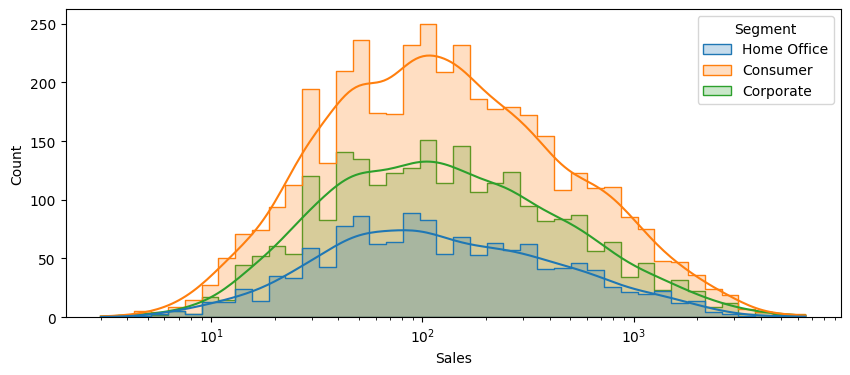

In [37]:
plt.figure(figsize=(10,4))
sns.histplot(df,x="Sales",kde=True,log_scale=True,hue="Segment",element="step")
plt.show()

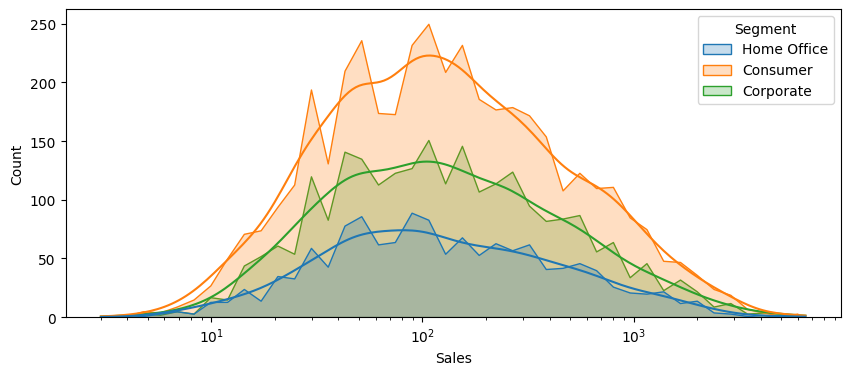

In [38]:
plt.figure(figsize=(10,4))
sns.histplot(df,x="Sales",kde=True,log_scale=True,hue="Segment",element="poly")
plt.show()

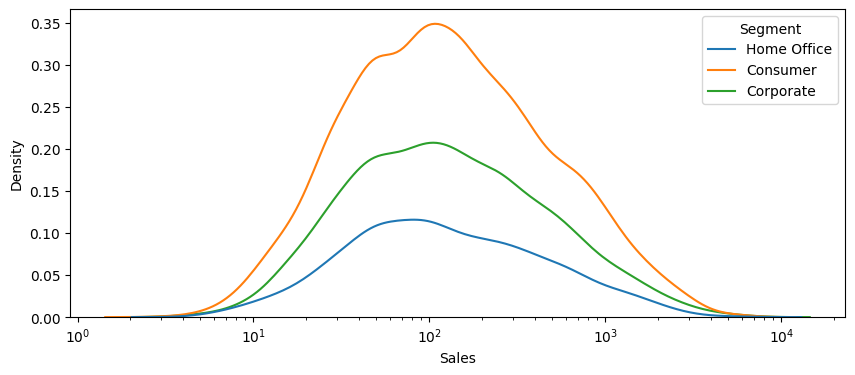

In [39]:
plt.figure(figsize=(10,4))
sns.kdeplot(df,x="Sales",log_scale=True,hue="Segment")
plt.show()

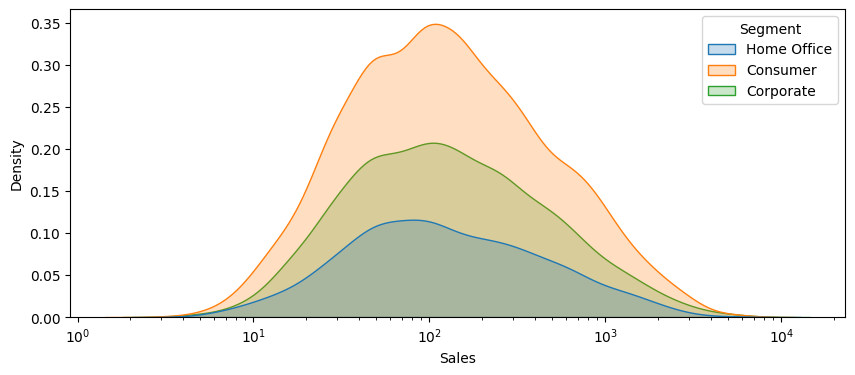

In [40]:
plt.figure(figsize=(10,4))
sns.kdeplot(df,x="Sales",log_scale=True,hue="Segment",fill=True)
plt.show()

In [41]:
df.groupby("Segment")["Sales"].mean()

Segment
Consumer       296.186392
Corporate      293.610581
Home Office    275.248712
Name: Sales, dtype: float64

In [42]:
month_category_sales_profit

,Month,Category,Sales,Profit
0,1,Furniture,453.910448,24.298507
1,1,Office Supplies,181.301205,27.346386
2,1,Technology,647.373333,90.666667
3,2,Furniture,583.764706,42.852941
4,2,Office Supplies,151.199275,27.894928
5,2,Technology,469.533333,42.988889
6,3,Furniture,549.786885,-7.688525
7,3,Office Supplies,155.297806,28.178683
8,3,Technology,485.341463,53.780488
9,4,Furniture,534.315789,76.807018


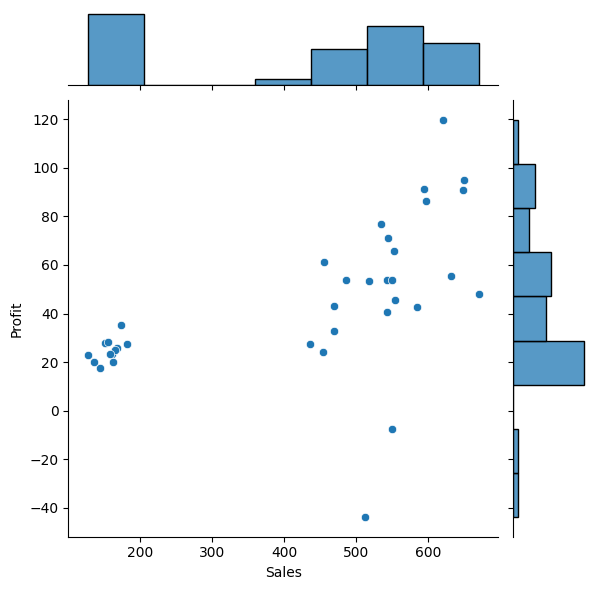

In [43]:
sns.jointplot(month_category_sales_profit,x="Sales",y="Profit")

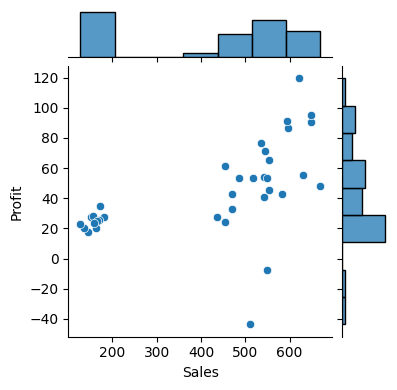

In [44]:
sns.jointplot(month_category_sales_profit,x="Sales",y="Profit",height=4)

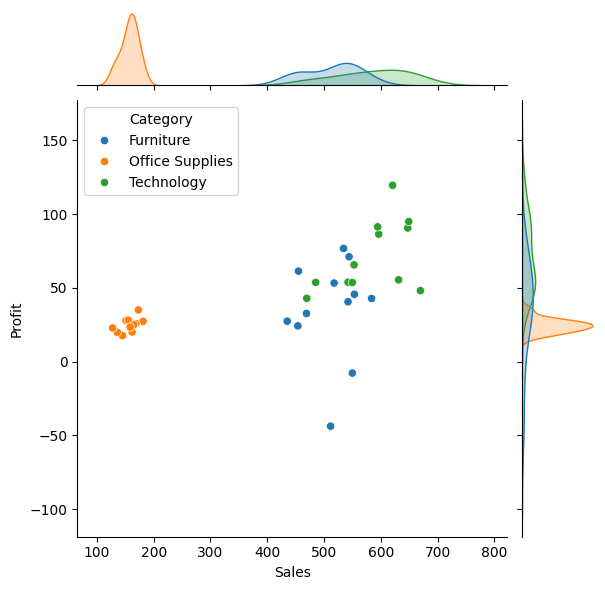

In [45]:
sns.jointplot(month_category_sales_profit,x="Sales",y="Profit",height=6,hue="Category")

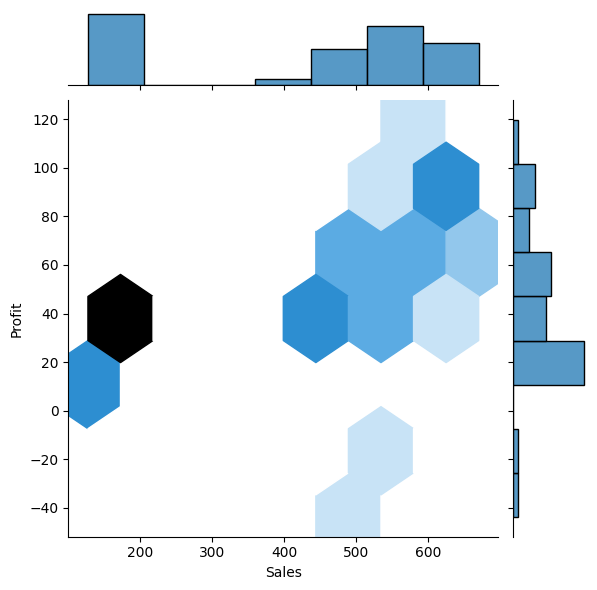

In [46]:
sns.jointplot(month_category_sales_profit,x="Sales",y="Profit",height=6,kind="hex")

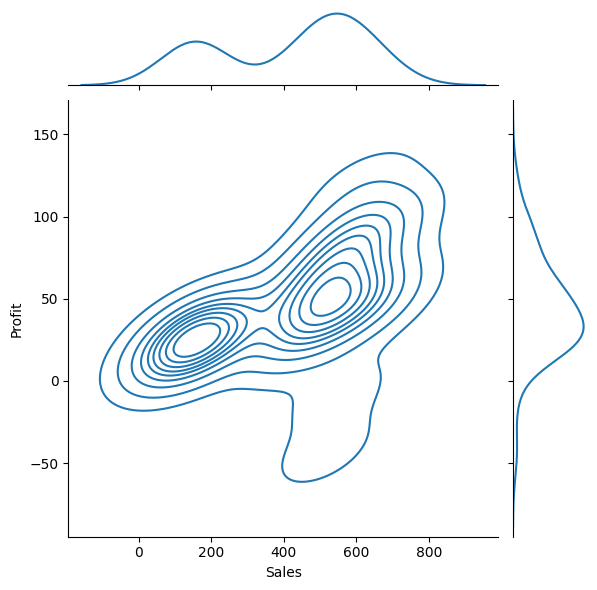

In [47]:
sns.jointplot(month_category_sales_profit,x="Sales",y="Profit",height=6,kind="kde")

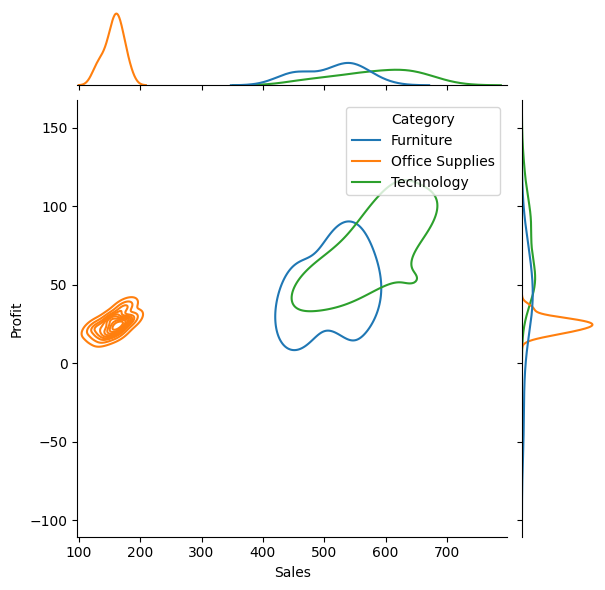

In [48]:
sns.jointplot(month_category_sales_profit,x="Sales",y="Profit",height=6,kind="kde",hue="Category")

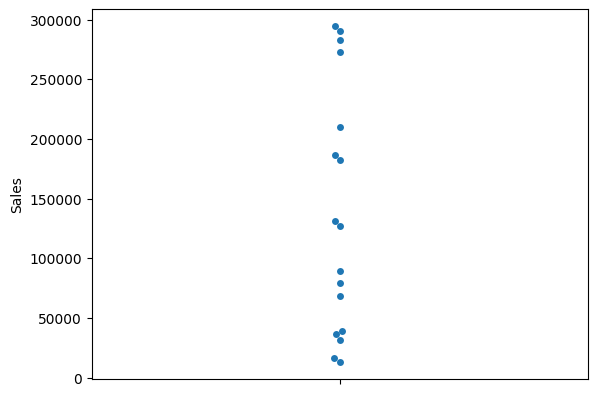

In [49]:
sns.swarmplot(sales_sub_category,y="Sales")
plt.show()

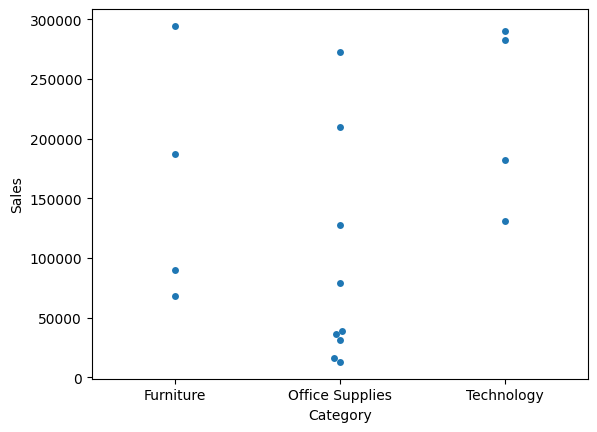

In [50]:
sns.swarmplot(sales_sub_category,y="Sales",x="Category")
plt.show()

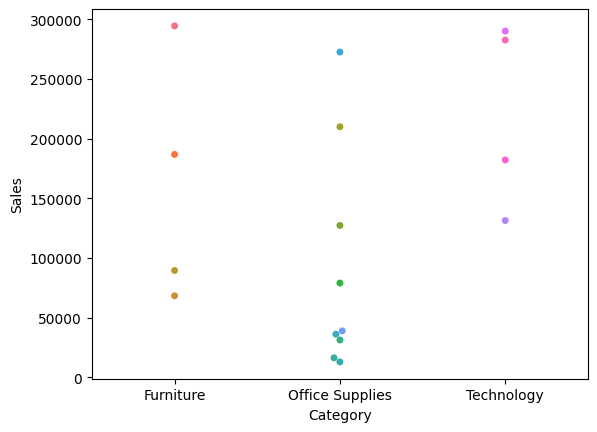

In [51]:
sns.swarmplot(sales_sub_category,y="Sales",x="Category",hue="Sub-Category",legend=False)
plt.show()

In [52]:
area_sales=df.groupby(["Region","Country","State"])[["Sales","Profit"]].sum().reset_index()
area_sales

,Region,Country,State,Sales,Profit
0,Central,Austria,Carinthia,10381,2832
1,Central,Austria,Salzburg,1357,461
2,Central,Austria,Styria,4441,1278
3,Central,Austria,Tyrol,6221,2064
4,Central,Austria,Upper Austria,5138,1490
...,...,...,...,...,...
123,South,Spain,Madrid,57207,13273
124,South,Spain,Melilla,145,33
125,South,Spain,Murcia,10558,1682
126,South,Spain,Navarra,4607,1169


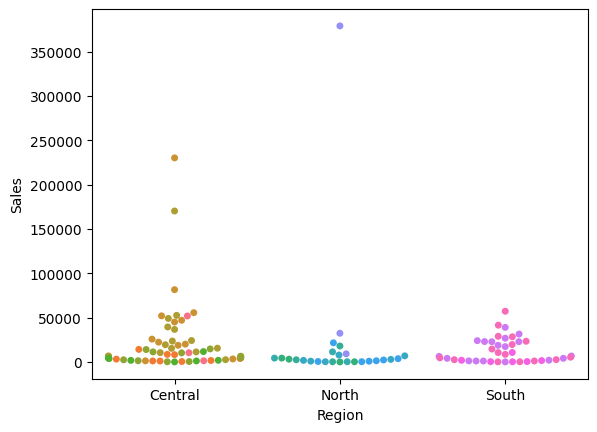

In [53]:
sns.swarmplot(area_sales,y="Sales",x="Region",hue="Country",legend=False)
plt.show()

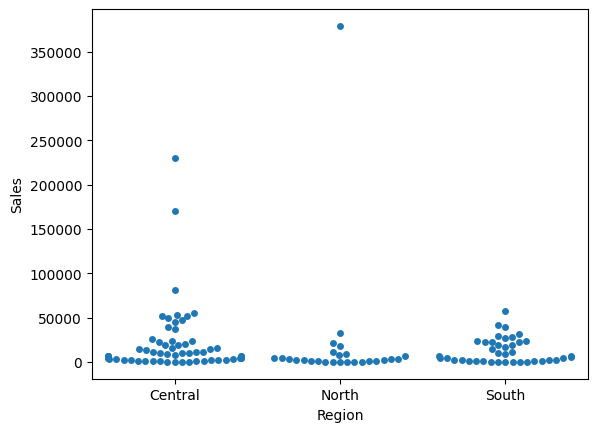

In [54]:
sns.swarmplot(area_sales,y="Sales",x="Region")
plt.show()

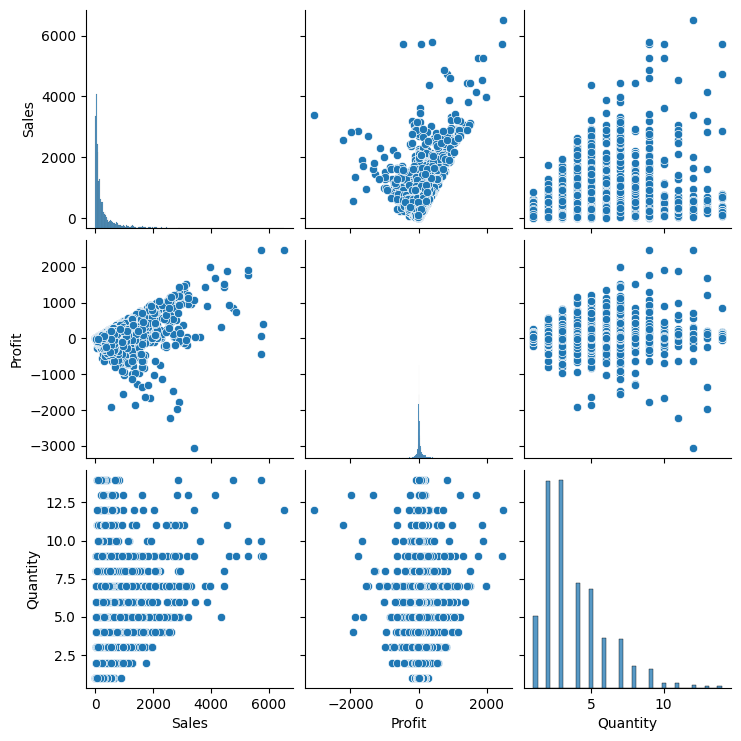

In [55]:
sns.pairplot(df[["Sales","Profit","Quantity"]])
plt.show()

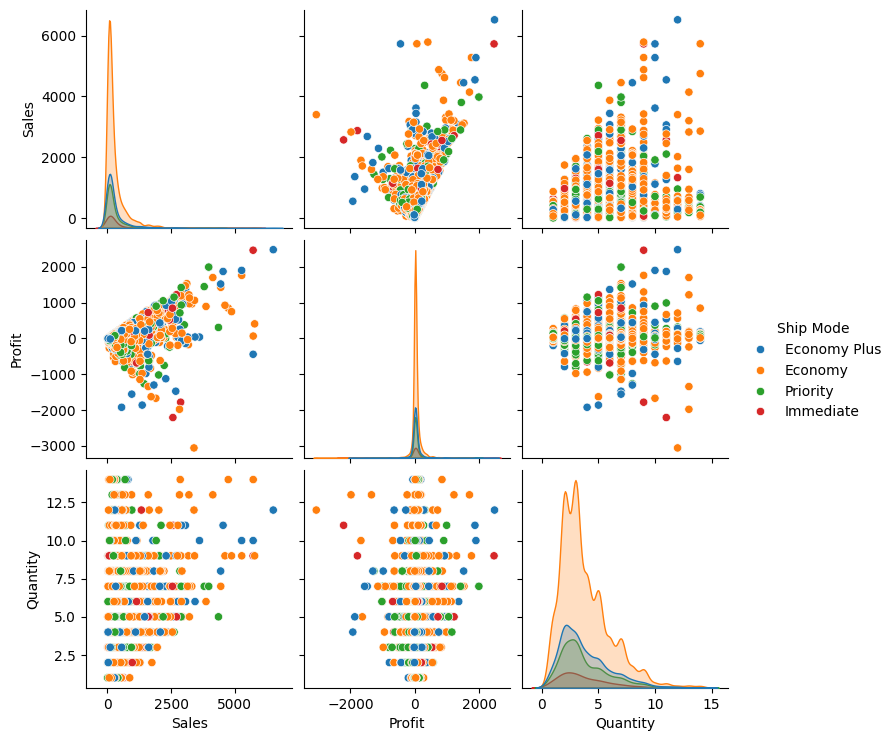

In [56]:
sns.pairplot(df[["Ship Mode","Sales","Profit","Quantity"]],hue="Ship Mode")
plt.show()